### 485. Introdução a Kmeans I
<h1>Algoritmo K-Means</h1><h2>Características</h2><ul><li>Muito utilizado na indústria</li><li>Um dos primeiros modelos de clusterização</li><li>Requer dados numéricos contínuos, preferencialmente na mesma escala</li><li>Requer a quantidade de grupos que se deseja formar</li></ul><h2>Vantagens</h2><ul><li>Muito conhecido</li><li>Escalável</li><li>Funciona bem para grande volume de dados</li><li>Simples e eficiente</li><li>Costuma performar muito bem</li></ul><h2>Desvantagens</h2><ul><li>Sensível a outliers</li><li>Não adequado para dados categóricos</li></ul><h2>Funcionamento</h2><ul><li>Define-se o número de clusters (k)</li><li>Inicializam-se os centróides aleatoriamente ou pelo método k-means++</li><li>Calcula-se a distância de cada ponto para os centróides</li><li>Aloca-se cada ponto ao centróide mais próximo</li><li>Recalcula-se a média dos pontos de cada cluster para definir novos centróides</li><li>Repete-se o processo até a convergência, quando os centróides param de se mover</li></ul><h2>Parâmetros</h2><ul><li>Quantidade de clusters (k)</li><li>Inicialização dos centróides<ul><li>Aleatória</li><li>k-means++ (mais inteligente)</li></ul></li><li>Quantidade máxima de interações</li><li>Métrica de distância (geralmente euclidiana)</li></ul><h2>Definição do k ideal</h2><ul><li>Existem métodos que serão abordados mais a fundo</li></ul>


### 486. Introdução a Kmeans II
<h1>Tema central: Introdução ao algoritmo de clusterização K-means (Camins)</h1><h2>Definição de Camins</h2><ul><li>Algoritmo de clusterização que divide os dados em k grupos (clusters)</li><li>Funciona atribuindo cada ponto de dado ao cluster mais próximo, baseado na distância entre o ponto e o centroide (média) de cada cluster</li><li>Processo iterativo que convergirá em uma solução</li></ul><h2>Parâmetros</h2><ul><li>n_clusters: número de clusters a serem formados</li><li>init: modo de inicialização dos centroides<ul><li>k-means++: melhores resultados</li><li>random: pode causar problemas de convergência</li></ul></li><li>n_init: número de vezes para rodar o algoritmo com inicializações diferentes, retornando o melhor resultado</li><li>max_iter: número máximo de iterações (interações) antes de parar</li></ul><h2>Funcionamento</h2><ol><li>Inicialização aleatória dos centroides</li><li>Atribuição de cada ponto ao cluster mais próximo (menor distância ao centroide)</li><li>Recálculo do centroide de cada cluster</li><li>Repete os passos 2 e 3 até a convergência</li></ol><h2>Determinando o número de clusters</h2><ul><li>Testar com diferentes valores de k (2, 3, 4...)</li><li>Calcular a variância total dentro dos clusters para cada k</li><li>Escolher o k baseado no &quot;cotovelo&quot; do gráfico de variância por k (grande redução seguida por redução marginal)</li></ul><h2>Vantagens</h2><ul><li>Simples, fácil interpretação</li><li>Eficiente para grandes conjuntos de dados</li></ul><h2>Desvantagens</h2><ul><li>Resultado depende da inicialização</li><li>Número de clusters k deve ser definido previamente</li><li>Sensível a outliers</li></ul>

### 487. Métricas de avaliação do Kmeans
<p>TEMA CENTRAL:Validação de clusters gerados por modelos de clusterização não supervisionados</p><p>TÓPICOS ABORDADOS:</p><ul><li>Não existe certo ou errado nos modelos não supervisionados, existe o que melhor explica os dados</li><li>Um bom cluster é homogêneo internamente e heterogêneo externamente</li></ul><p>MÉTRICAS PARA VALIDAÇÃO:</p><ul><li><p>Within Cluster Sum of Squares (WCSS):</p><ul><li>Soma dos quadrados dentro de cada cluster</li><li>Ajuda a definir a melhor quantidade de clusters</li><li>Escolhe-se o &quot;cotovelo&quot; no gráfico de WCSS x Número de clusters</li></ul></li><li><p>Coeficiente de Silhueta:</p><ul><li>Compara distância média dentro do cluster com distância média para o cluster mais próximo</li><li>Varia de -1 a 1 (quanto maior, melhor)</li><li>Permite avaliar a alocação de cada observação nos clusters</li></ul></li><li><p>Davis-Bouldin:</p><ul><li>Razão entre similaridade intracluster e intercluster</li><li>Quanto menor, melhor</li></ul></li><li><p>Calinski-Harabasz:</p><ul><li>Razão entre similaridade intercluster e intracluster</li><li>Quanto maior, melhor</li></ul></li></ul>

### 488. Kmeans na prática I

In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [2]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [3]:
# Simulated Data
# Simulate Clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-3.502078,-5.208231
1,5.921104,6.488542
2,5.246448,6.603506
3,-5.749469,-4.770688
4,-3.030977,-4.793850


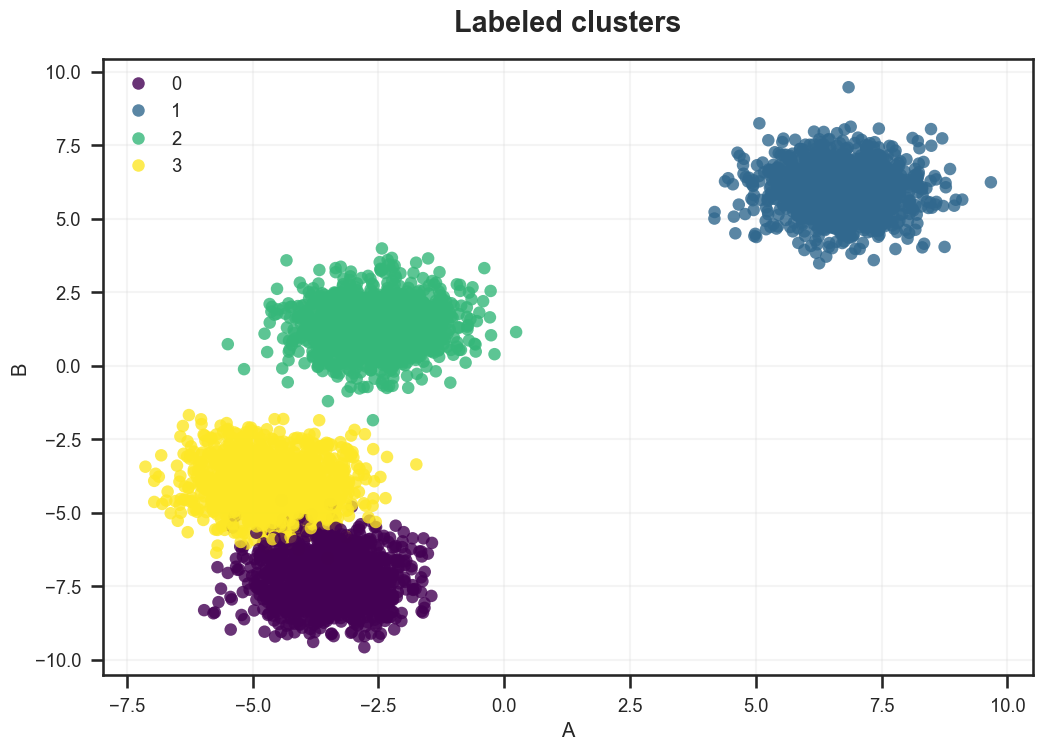

In [4]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y= 'B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [5]:
# Distinct APIs for K-means
# Usando a função 
centroids, labels, intertia = k_means(X,n_clusters=4)

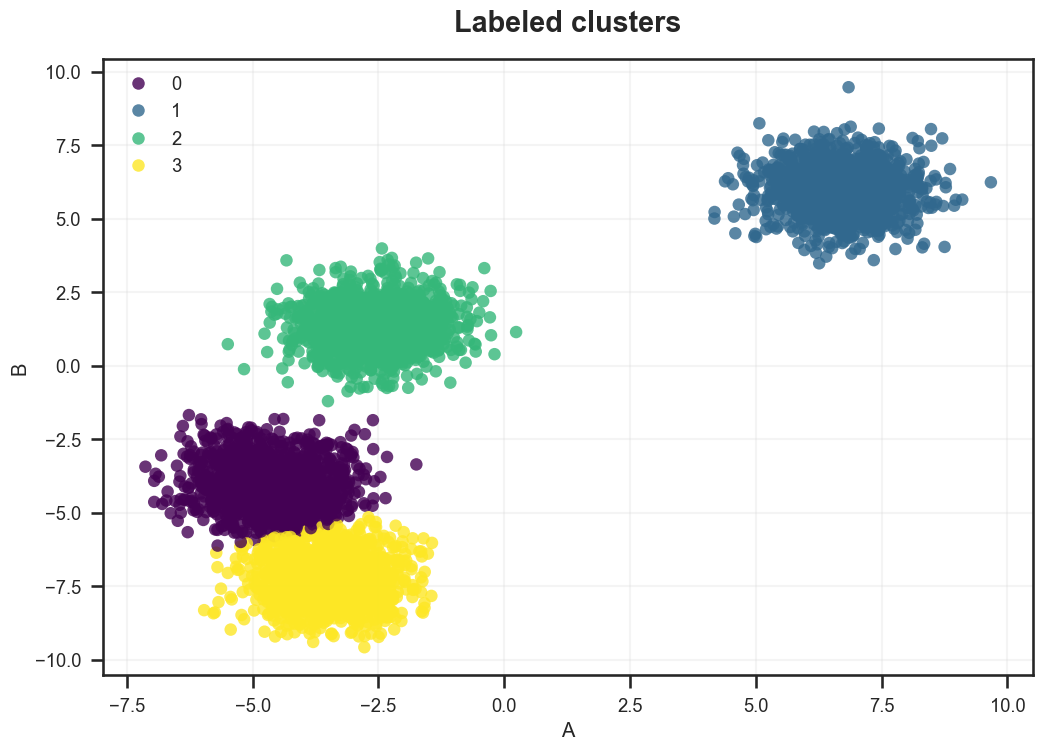

In [6]:
sns.scatterplot(data=df, x='A', y= 'B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

### 489. Kmeans na prática II
<h1>Como funciona uma classe no scikit-learn</h1><h2>Definição de classe</h2><ul><li>Uma classe é estanciada dessa forma:</li></ul><pre><code>Model = camins() </code></pre><ul><li>É utilizada em pipelines do scikit-learn</li><li>Serve para colocar em modelos supervisionados como classificação</li></ul><h2>Diferença entre classe e função</h2><ul><li>Classe é utilizada em pipelines</li><li>Função não</li></ul><h2>Exemplo de classe Kmeans</h2><ul><li>Instancia a classe</li></ul><pre><code>cluster = KMeans(n_clusters=4)</code></pre><ul><li>Treina o modelo</li></ul><pre><code>cluster.fit(X)</code></pre><ul><li>Acessa atributos criados após o .fit como:</li></ul><pre><code>cluster.cluster_centers_cluster.labels_cluster.inertia_</code></pre><h2>Plotando os clusters</h2><ul><li>Pode-se plotar os centróides para visualizar os clusters</li></ul><pre><code>plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1],             marker='*', s=500)</code></pre><ul><li>Centróides ajudam a interpretar os clusters</li></ul><h2>Próximos passos</h2><ul><li>Avaliação de modelos de clusterização</li></ul>

In [7]:
#  Using Kmeans
model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

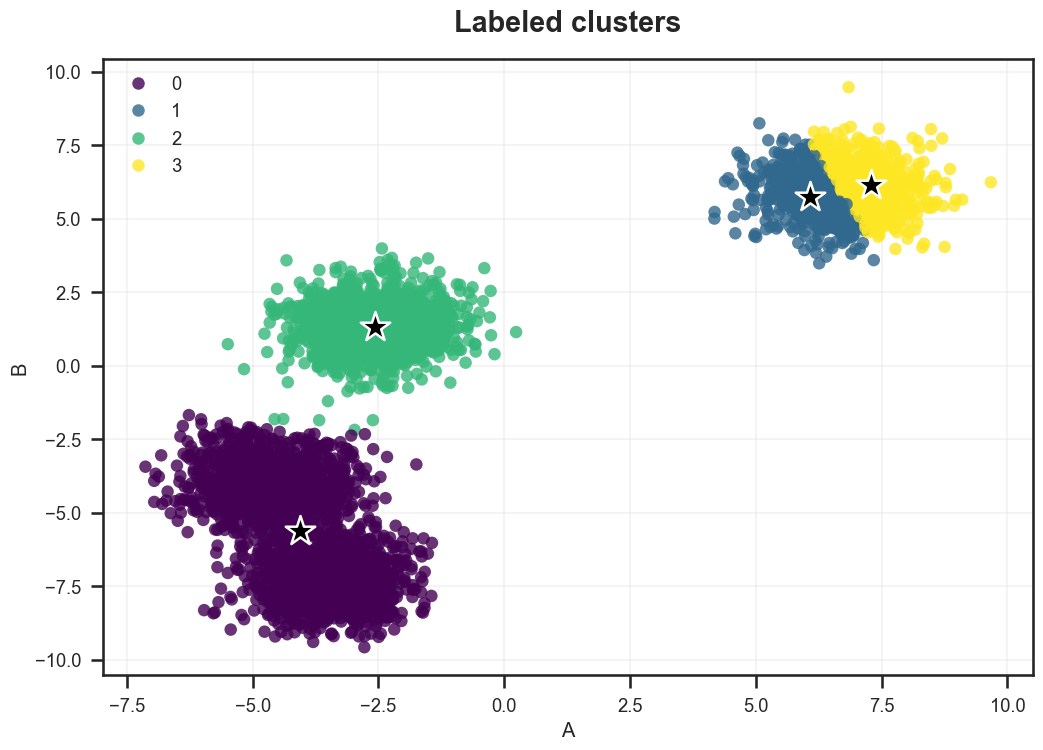

In [8]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

### 490. Kmeans na prática - Avaliando o modelo I
<h1>Avaliação de modelos de clustering</h1><h2>Tema central</h2><p>Avaliação de métricas para medir a qualidade dos clusters gerados pelos algoritmos de clustering.</p><h2>Métricas abordadas</h2><ul><li>WCSS (Within Cluster Sum of Squares) ou distorção</li><li>Coeficiente de Silhouette</li><li>Índice de Davies-Bouldin</li><li>Índice de Calinski-Harabasz</li></ul><h3>WCSS ou distorção</h3><ul><li>Mede a soma dos quadrados das distâncias dentro de cada cluster</li><li>Quanto menor, melhor</li><li>Pode ser visualizado no gráfico de cotovelo para identificar o número ideal de clusters</li></ul><h3>Coeficiente de Silhouette</h3><ul><li>Varia de -1 a 1</li><li>Quanto mais próximo de 1, melhor</li><li>Mede quão similar um ponto é ao seu cluster em comparação aos outros clusters</li></ul><h3>Índice de Davies-Bouldin</h3><ul><li>Quanto menor, melhor</li><li>Mede a razão entre dispersões intra-cluster e separações inter-cluster</li></ul><h3>Índice de Calinski-Harabasz</h3><ul><li>Quanto maior, melhor</li><li>Razão entre a dispersão inter-clusters e intra-clusters</li></ul><h2>Bibliotecas</h2><ul><li>Scikit-Learn</li><li>Yellowbrick</li></ul><h2>Considerações</h2><ul><li>Métricas sozinhas não indicam muita coisa, é preciso comparar para diferentes números de clusters</li><li>Sugestões automáticas nem sempre acertam o número ideal de clusters</li></ul>

In [9]:
# sklearn metrics
silhouette_score(X,labels)


0.5934130804716081

In [10]:
# Quanto menos é melhor (intracluster/intracluster)
davies_bouldin_score(X,labels)

0.8387591279164026

In [11]:
# Quanto mais é melhor (soma_intercluster / soma_intracluster)
calinski_harabasz_score(X,labels)

27921.43825980866

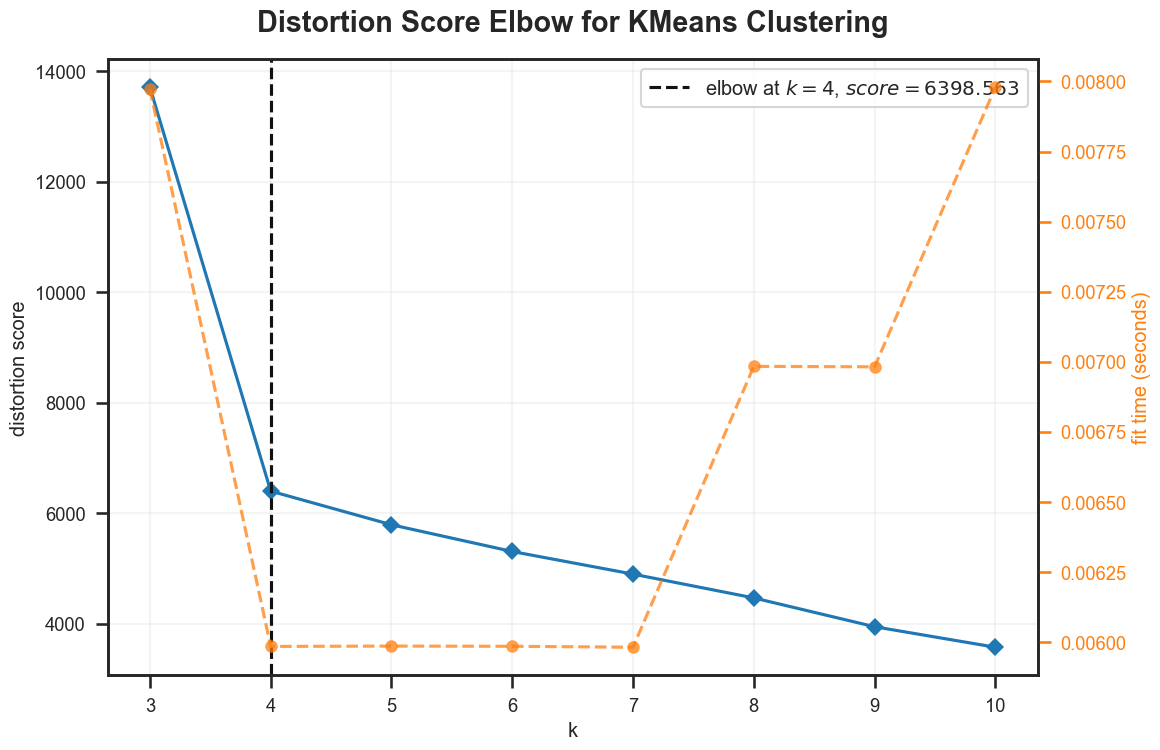

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), k=(3, 11))

In [12]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), X, k=(3,11))

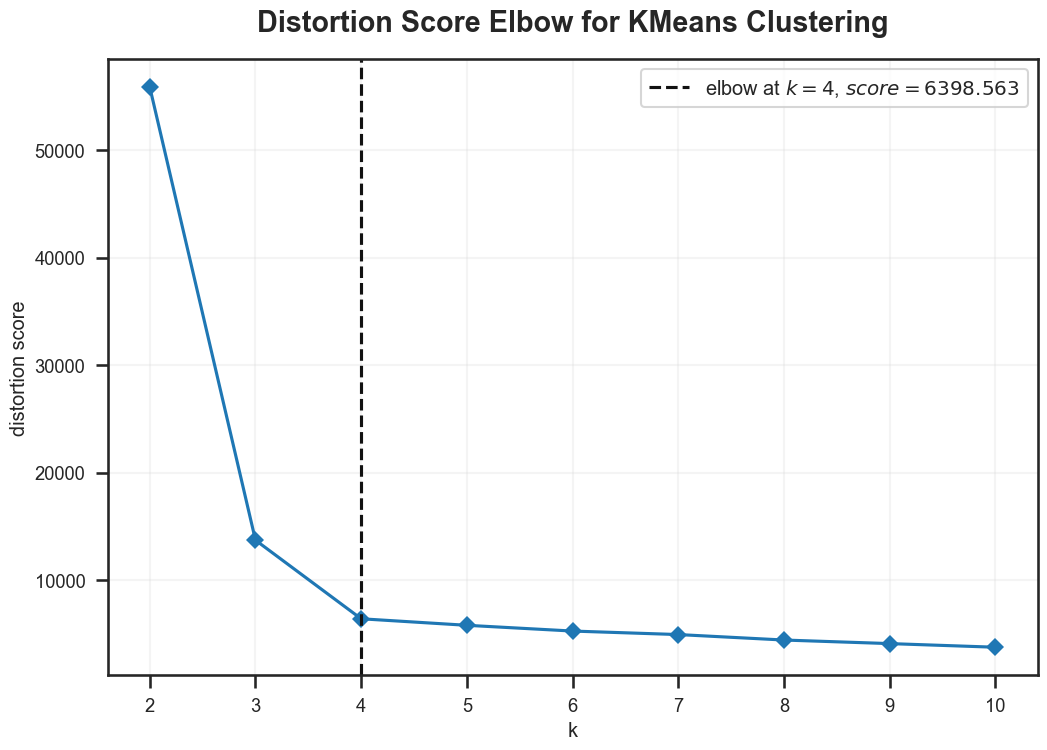

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [13]:
kelbow_visualizer(KMeans(), X, k=10, timings=False)

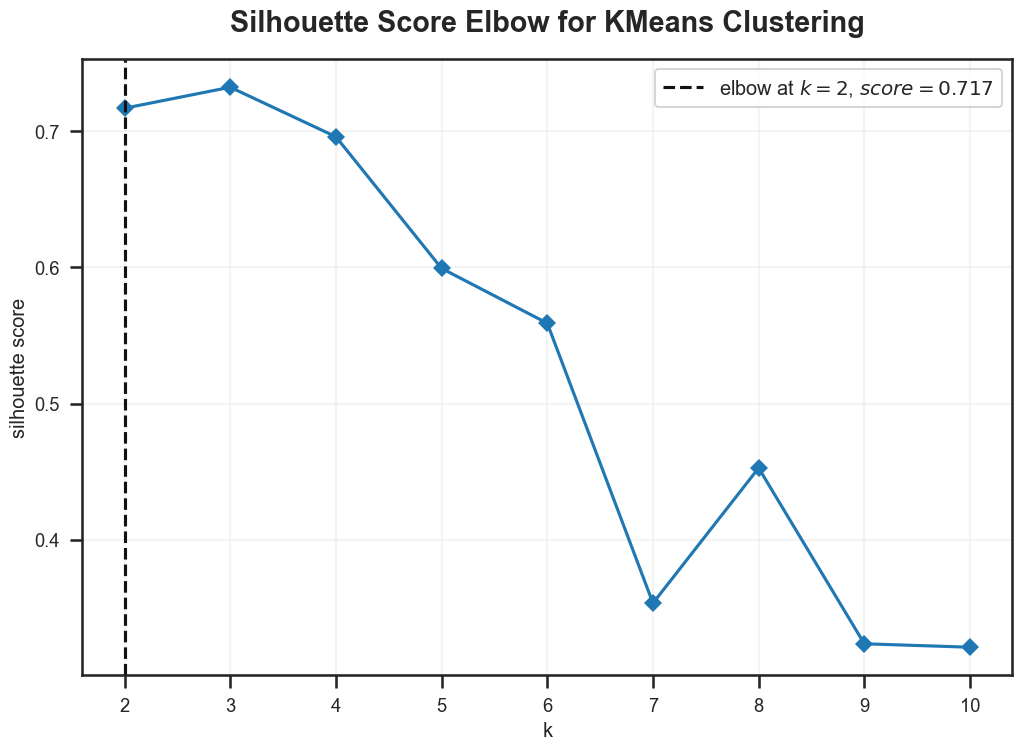

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=10), metric='silhouette',
                 timings=False)

In [14]:
kelbow_visualizer(KMeans(), X, k=10, timings=False, metric='silhouette')

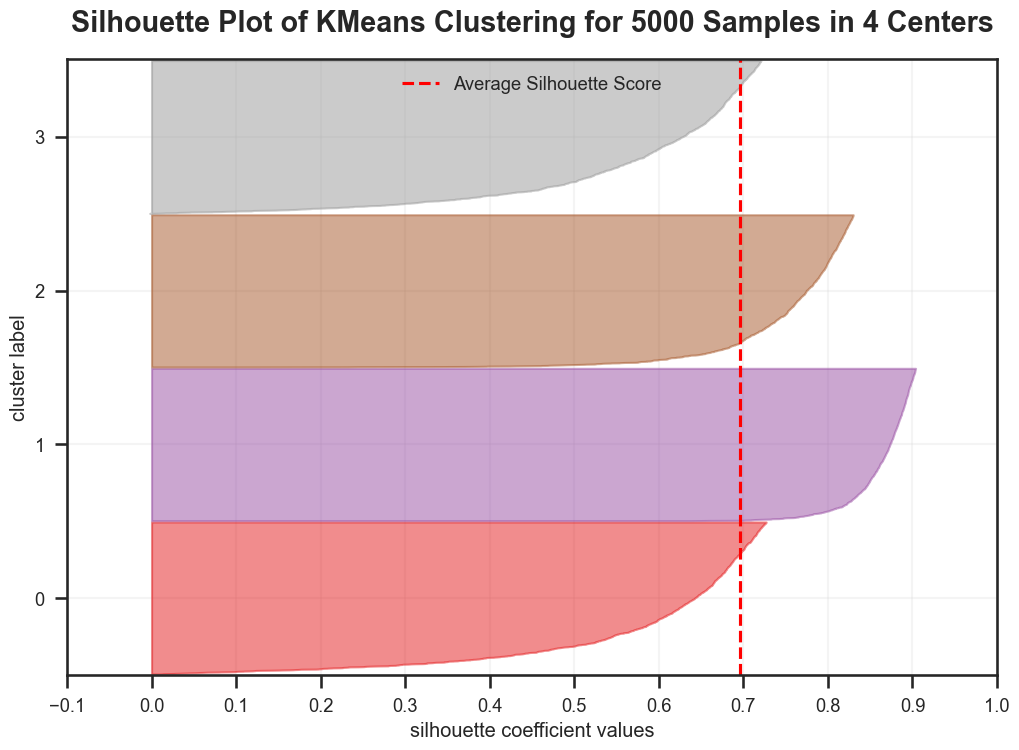

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [15]:
# silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=4), X)

### 491. Kmeans na prática - Avaliando o modelo II
<h1>Escolha do número de clusters</h1><h2>Métricas utilizadas</h2><ul><li>Silhueta</li><li>Davies-Bouldin</li><li>Calinski-Harabasz</li></ul><h2>Abordagem</h2><ul><li>Testar diferentes valores de K (número de clusters)<ul><li>De 2 a 10 clusters</li></ul></li><li>Para cada K:<ul><li>Criar modelo K-means</li><li>Obter previsões e rótulos</li><li>Calcular inércia e métricas</li></ul></li><li>Salvar resultados em um dicionário<ul><li>Chaves:<ul><li>K</li><li>Inércia</li><li>Nome da métrica</li></ul></li></ul></li><li>Juntar dicionários em uma lista</li><li>Transformar lista em DataFrame</li><li>Visualizar resultados<ul><li>Destacar melhores valores:<ul><li>Silhueta e Calinski-Harabaz: maiores valores</li><li>Davies-Bouldin: menores valores</li></ul></li></ul></li></ul><h2>Conclusão</h2><ul><li>Todas métricas indicaram K=4 como melhor</li><li>Métrica de Silhueta teve maior peso na decisão</li><li>Visualização do DataFrame com destaque dos melhores valores facilitou a interpretação</li></ul><p>O vídeo mostra uma abordagem prática para escolher o número ideal de clusters em um problema de clusterização K-means, testando diferentes valores de K e utilizando métricas para avaliar a qualidade dos agrupamentos. A visualização dos resultados em um DataFrame estilizado facilita a identificação do melhor K.</p>

In [16]:
# Create list of dictionaries
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X)
    cluster_results_dict = {'k':k}
    cluster_results_dict['inertia']= model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X, labels)
    cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results



[{'k': 2,
  'inertia': 55873.93162509119,
  'silhouette_score': 0.7169599629076533,
  'davies_bouldin_score': 0.3236496146559702,
  'calinski_harabasz_score': 15988.190026753151},
 {'k': 3,
  'inertia': 13713.09318454778,
  'silhouette_score': 0.7323897616437478,
  'davies_bouldin_score': 0.3381919628871639,
  'calinski_harabasz_score': 40247.01047001061},
 {'k': 4,
  'inertia': 6398.793017083066,
  'silhouette_score': 0.6960113291947003,
  'davies_bouldin_score': 0.43223769356926434,
  'calinski_harabasz_score': 59395.86041854903},
 {'k': 5,
  'inertia': 5873.13779903855,
  'silhouette_score': 0.5803035420076335,
  'davies_bouldin_score': 0.7727750408746606,
  'calinski_harabasz_score': 48638.384807060196},
 {'k': 6,
  'inertia': 5263.331824392328,
  'silhouette_score': 0.49060656765810773,
  'davies_bouldin_score': 0.9547557630641657,
  'calinski_harabasz_score': 43529.09396359818},
 {'k': 7,
  'inertia': 4756.934734151312,
  'silhouette_score': 0.44949700865452086,
  'davies_bouldin

In [17]:
# Create dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,55873.931625,0.716960,0.323650,15988.190027
3,13713.093185,0.732390,0.338192,40247.010470
4,6398.793017,0.696011,0.432238,59395.860419
5,5873.137799,0.580304,0.772775,48638.384807
6,5263.331824,0.490607,0.954756,43529.093964
7,4756.934734,0.449497,1.033069,40215.853254
8,4245.194641,0.314797,1.192340,38707.009631
9,3906.629372,0.319862,1.100272,36851.658040
10,3739.825906,0.318747,1.076230,34236.136239


In [18]:
# Mudando de cor
def highlight_max_green(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [19]:
# Mudando de cor
def highlight_min_green(s):
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

In [20]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .apply(highlight_max_green, subset=['silhouette_score', 'calinski_harabasz_score'])
  .apply(highlight_min_green, subset=['davies_bouldin_score'])
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,55873.931625,0.716960,0.323650,15988.190027
3,13713.093185,0.732390,0.338192,40247.010470
4,6398.793017,0.696011,0.432238,59395.860419
5,5873.137799,0.580304,0.772775,48638.384807
6,5263.331824,0.490607,0.954756,43529.093964
7,4756.934734,0.449497,1.033069,40215.853254
8,4245.194641,0.314797,1.192340,38707.009631
9,3906.629372,0.319862,1.100272,36851.658040
10,3739.825906,0.318747,1.076230,34236.136239


### 492. Kmeans na prática - Avaliando o modelo III

In [21]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[3.08771284e-02, 7.88339847e-02],
       [6.05996055e-04, 4.63369916e-01],
       [5.48278875e-01, 9.51712987e-01],
       ...,
       [4.87091291e-01, 4.83012480e-01],
       [1.76042544e-01, 5.58373296e-01],
       [5.65898383e-01, 8.85767645e-01]])

<Axes: >

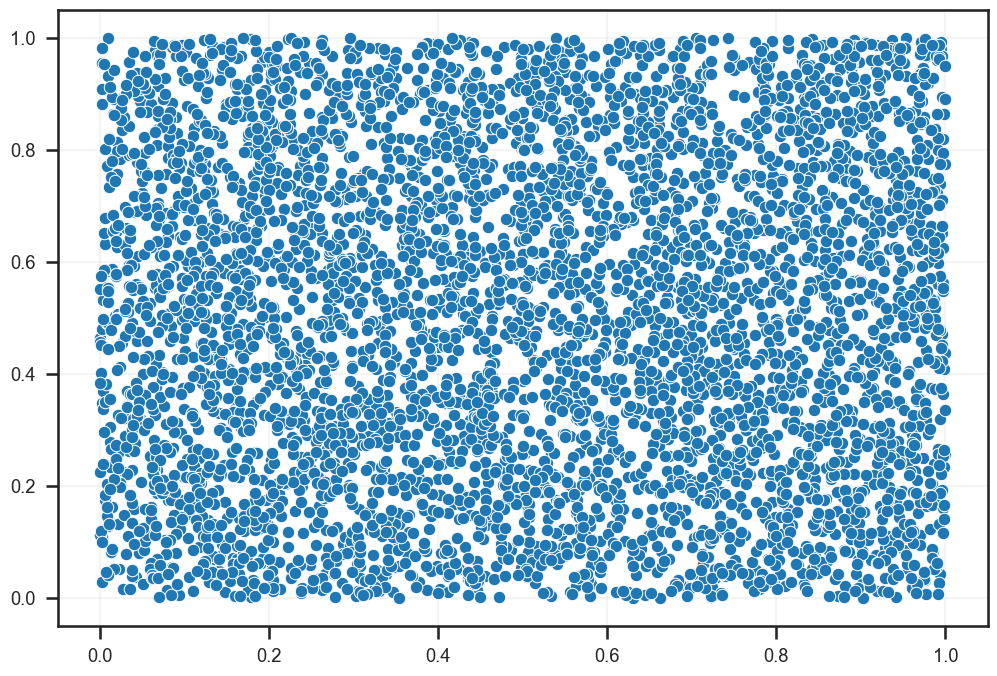

In [22]:
sns.scatterplot(x=X_random[:,0],y=(X_random[:,1]))

In [23]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X_random)
    cluster_results_dict = {'k':k}
    cluster_results_dict['inertia']= model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(X_random, labels)
    cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,514.055153,0.358888,1.166114,3098.317507
3,328.728885,0.377090,0.861006,3830.717553
4,208.383074,0.406222,0.773116,4989.587588
5,177.140786,0.385600,0.848773,4621.554945
6,148.240588,0.376869,0.844988,4611.836020
7,125.820160,0.372893,0.799214,4675.423671
8,105.664893,0.366782,0.809636,4907.091263
9,91.509552,0.370893,0.772270,5053.414040
10,84.922682,0.358090,0.838727,4882.498250


In [24]:
def highlight_max_green(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [25]:
def highlight_min_green(s):
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

In [26]:
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .apply(highlight_max_green, subset=['silhouette_score', 'calinski_harabasz_score'])
  .apply(highlight_min_green, subset=['davies_bouldin_score'])
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,514.055153,0.358888,1.166114,3098.317507
3,328.728885,0.377090,0.861006,3830.717553
4,208.383074,0.406222,0.773116,4989.587588
5,177.140786,0.385600,0.848773,4621.554945
6,148.240588,0.376869,0.844988,4611.836020
7,125.820160,0.372893,0.799214,4675.423671
8,105.664893,0.366782,0.809636,4907.091263
9,91.509552,0.370893,0.772270,5053.414040
10,84.922682,0.358090,0.838727,4882.498250


In [27]:
# Comparação com forma interativa
@interact(k=(2,11), data=['X', 'X_random'])
def plot_kmeans(k,data):
    data= X if data=='X' else X_random
    model= KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(data)
    sns.scatterplot(x=data[:,0], y =data[:,1], hue=labels,**scatter_kwargs)


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

### 493. Kmeans com alta dimensionalidade I
<h1>Tema central:</h1><p>Como executar, publicar e avaliar caminhos com muitas colunas no banco de dados</p><h2>Simulação de dataset com muitas colunas</h2><ul><li>Código para simular 1000 linhas e 10 colunas com 4 clusters</li><li>Aplicação de PCA para redução de dimensionalidade</li></ul><h2>PCA - Análise de Componentes Principais</h2><ul><li>Objetivo: reduzir a dimensionalidade/quantidade de colunas</li><li>Mantém a informação sobre a variância explicada</li><li>Retorna componentes principais que explicam a maior parte da variância</li></ul><h3>Interpretação dos componentes</h3><ul><li>1o componente explica 55% da variância</li><li>2o componente explica 30% da variância</li><li>1o + 2o = 86% da variabilidade total</li><li>3o componente explica 10-11% da variância</li><li>1o + 2o + 3o = 97% da variância total</li></ul><h2>Utilidade da PCA</h2><ul><li>Permite plotar os dados com menos dimensões</li><li>Facilita a análise visual dos relacionamentos entre variáveis</li><li>Prepara os dados para aplicação de algoritmos como caminhos</li></ul>

In [28]:
# Simulate clusters with high dimensional data 
X_dim,y_dim= datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [29]:
# Apply PCA
pca= PCA()
pca_components = pca.fit_transform(df_dim)

df_pca= pd.DataFrame(pca_components,columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,-3.122523,6.136654,0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,-0.814840
1,-11.436590,6.559320,-4.410817,1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,0.537870
2,6.443283,-9.334398,-3.091811,1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,-0.198899
3,5.114664,-8.403564,-3.589742,1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,-0.744221
4,-10.328252,5.222973,-3.462066,-0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,-0.041215


In [30]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


### 494. Kmeans com alta dimensionalidade II
<h1>Técnicas de agrupamento de dados</h1><h2>Análise de Componentes Principais (PCA)</h2><ul><li>Utiliza duas colunas de dados (PC1 e PC2)</li><li>Colorização pelo grupo de dados (label Y)</li><li>Permite visualizar a relação entre os pontos de dados</li></ul><h2>Clusterização por K-means</h2><ul><li>Utiliza a função ao invés da classe Kmeans</li><li>Retorna: centroides, labels e inércia</li><li>Rodado com 2 componentes principais (PCs) e 4 clusters</li><li>Resultado plotado sem as cores dos grupos conhecidos</li><li>Identificou grupos corretamente</li></ul><h2>Visualização 3D</h2><ul><li>Utiliza 3 PCs (PC1, PC2 e PC3)</li><li>Biblioteca Plotly Express</li><li>Permite visualizar as 3 variáveis de uma vez</li></ul><h2>Considerações finais</h2><ul><li>PCA pode ser usado para reduzir dimensionalidade antes do Kmeans</li><li>Porém Kmeans pode ser aplicado nos dados originais também</li><li>PCA serve para visualizar a disposição dos dados e resultados</li></ul>

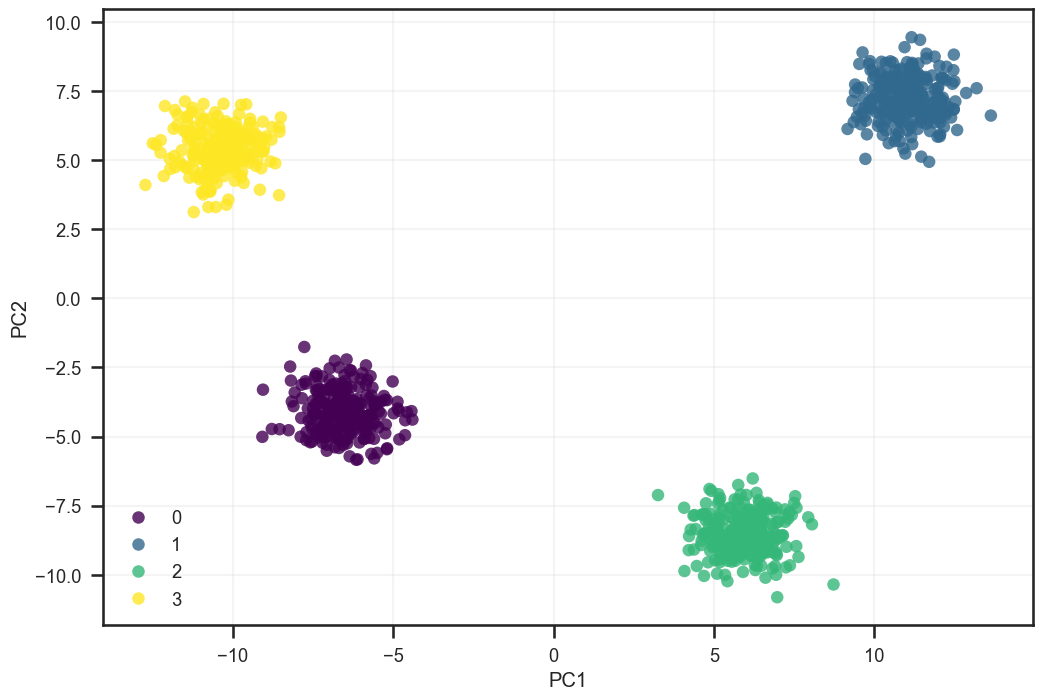

In [31]:
# Plot Pca with true label 
sns.scatterplot(data=df_pca, x='PC1', y= 'PC2', hue=y_dim, **scatter_kwargs);

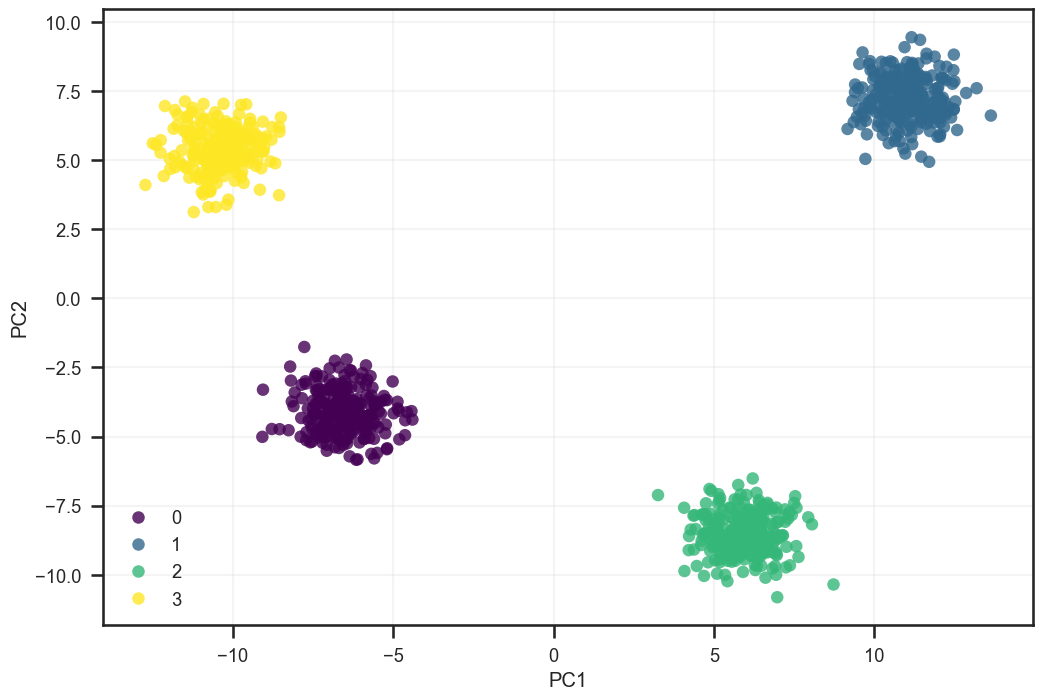

In [32]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3],4)[1]
sns.scatterplot(data=df_pca,x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [33]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')